# Feature of Idiomicity model

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append("../")

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from itertools import chain

In [3]:
from MWE2019.utils import tqdm
from MWE2019.materials import Materials
from MWE2019 import features
from MWE2019.utils import get_cache_path, install_data_cache

In [4]:
SEED = 15652
np.random.seed(SEED)

In [5]:
materials = Materials()

Remove NGram frequency < 50: 3588 removed
QIE removed: 0
Idiom removed: 3588
Character count before removal: 12883
Character count after removal: 2824
Remove character not in ngrams: 10059 removed
load CwnNodeVec from cache:  ..\MWE2019\..\data\cache_cwn_node_vec\cwn_node_vec_homophily.pkl
load variations from  E:\LangOn\MWE2019\data\cache_ngrams_list\ngrams_vars_samples.csv
Load QIE proper:  E:\LangOn\MWE2019\data\qie_list\qie_proper.csv


In [25]:
feat_path = get_cache_path('model_features', 'features.pkl')
with open(feat_path, "rb") as fin:
    (comp_feats, composite_feats, vars_feats) = pickle.load(fin)
tags = np.array(features.get_tags(materials))
tags = ["prefab" if x=="qie" else x for x in tags]

## Feature 3. Composition model (with M-Vector + S-Vector)

## Scatter of three features

In [26]:
def split_qie_and_idiom(x, labels):
    return ([x for x, y in zip(x, labels) if y == "idiom"], 
            [x for x, y in zip(x, labels) if y == "prefab"])
idiom_comp_feats, qie_comp_feats = split_qie_and_idiom(comp_feats, tags)
idiom_composite_feats, qie_composite_feats = split_qie_and_idiom(composite_feats, tags)
idiom_vars_feats, qie_vars_feats = split_qie_and_idiom(vars_feats, tags)

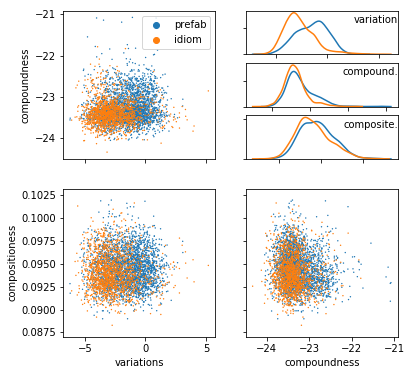

In [27]:
fig = plt.figure()
gs0 = gridspec.GridSpec(2, 2, figure=fig)
gs1 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[0,1])

ax10 = plt.Subplot(fig, gs0[1,0])
ax11 = plt.Subplot(fig, gs0[1,1])
ax00 = plt.Subplot(fig, gs0[0,0])


ax01a = plt.Subplot(fig, gs1[0,0])
ax01b = plt.Subplot(fig, gs1[1,0])
ax01c = plt.Subplot(fig, gs1[2,0])

# fig.suptitle("Scatter plots of features in classifiying proper QIEs")
fig.set_size_inches(6,6)

SZ = 2
sns.set_palette('tab10')
sns.scatterplot(x=vars_feats, y=comp_feats, hue=tags, marker='o', linewidth=0, s=SZ, ax=ax00)
sns.scatterplot(x=vars_feats, y=composite_feats, hue=tags, marker='o', linewidth=0, s=SZ, ax=ax10)
sns.scatterplot(x=comp_feats, y=composite_feats, hue=tags, marker='o', linewidth=0, s=SZ, ax=ax11)

sns.distplot(qie_vars_feats, label='proper', hist=False, kde=True, ax=ax01a)
sns.distplot(idiom_vars_feats, label='general', hist=False, kde=True, ax=ax01a)
sns.distplot(qie_comp_feats, label='proper', hist=False, kde=True, ax=ax01b)
sns.distplot(idiom_comp_feats, label='general', hist=False, kde=True, ax=ax01b)
sns.distplot(qie_composite_feats, label='proper', hist=False, kde=True, ax=ax01c)
sns.distplot(idiom_composite_feats, label='general', hist=False, kde=True, ax=ax01c)

# axes[0][1].axis('off')
# axes[0][1].legend(loc="lower left")
feat_labels = ["variation", "compound.", "composite."]
for ax01_i, ax_label in zip((ax01a, ax01b, ax01c), feat_labels):
    ax01_i.get_legend().remove()
    ax01_i.set_yticklabels([])
    ax01_i.set_xticklabels([])
    ax01_i.text(1, 0.9, ax_label,
        horizontalalignment='right',
        verticalalignment='top',
        transform = ax01_i.transAxes)
ax10.set_xlabel('variations')
ax10.set_ylabel('compositioness')
ax10.get_legend().remove()
ax11.set_xlabel('compoundness')
ax11.set_yticklabels([])
ax11.get_legend().remove()
ax00.set_ylabel('compoundness')
ax00.set_xticklabels([])
ax00.legend(loc="upper right")

fig.add_subplot(ax10)
fig.add_subplot(ax11)
fig.add_subplot(ax00)
fig.add_subplot(ax01a)
fig.add_subplot(ax01b)
fig.add_subplot(ax01c)

plt.show()

In [28]:
scatter_path = get_cache_path('model_results', 'feature_scatters_dist.png')
fig.savefig(scatter_path, dpi=150)

In [23]:
from scipy.stats import ttest_ind
def mean_groups(grp_a, grp_b, label):
    print("-"*10)
    print(f"{label} (mean)", "{0:.4f} vs. {1:.4f}".format(np.mean(grp_a), np.mean(grp_b)))
    print(f"{label} (SD)", "{0:.2E} vs. {1:.2E}".format(
        np.std(grp_a), np.std(grp_b)))
    ttest = ttest_ind(grp_a, grp_b)
    print("{label} t({df}) = {stat:.4f}, p = {pval:.2E}".format(
        label=label,
        stat=ttest.statistic, pval=ttest.pvalue, df=len(grp_a)+len(grp_b)-2))

In [24]:
mean_groups(qie_vars_feats, idiom_vars_feats, "Variation, QIE vs. Idiom")
mean_groups(qie_comp_feats, idiom_comp_feats, "Compound, QIE vs. Idiom")
mean_groups(qie_composite_feats, idiom_composite_feats, "Composite, QIE vs. Idiom")

----------
Variation, QIE vs. Idiom (mean) -1.4810 vs. -2.6859
Variation, QIE vs. Idiom (SD) 1.51E+00 vs. 1.49E+00
Variation, QIE vs. Idiom t(3994) = 24.6401, p = 6.46E-125
----------
Compound, QIE vs. Idiom (mean) -23.2508 vs. -23.3859
Compound, QIE vs. Idiom (SD) 3.68E-01 vs. 2.95E-01
Compound, QIE vs. Idiom t(3994) = 12.1113, p = 3.49E-33
----------
Composite, QIE vs. Idiom (mean) 0.0945 vs. 0.0941
Composite, QIE vs. Idiom (SD) 1.98E-03 vs. 2.02E-03
Composite, QIE vs. Idiom t(3994) = 7.2321, p = 5.67E-13


## QIE Proper

In [12]:
proper_exp_path = get_cache_path('model_results', 'qie_proper_exp.pkl')
with open(proper_exp_path, "rb") as fin:    
    qie_proper_exp = pickle.load(fin)     
    is_proper = qie_proper_exp["is_proper"] 
    pr_comp_feats = qie_proper_exp["pr_comp_feats"]
    pr_composite_feats = qie_proper_exp["pr_composite_feats"]
    pr_vars_feats = qie_proper_exp["pr_vars_feats"]

In [13]:
is_proper = ["general" if x=="generic" else x for x in is_proper]

In [14]:
def split_proper_and_generics(pr_x, labels):
    return ([x for x, y in zip(pr_x, labels) if y == "general"], 
            [x for x, y in zip(pr_x, labels) if y == "proper"])
generic_comp_feats, proper_comp_feats = split_proper_and_generics(pr_comp_feats, is_proper)
generic_composite_feats, proper_composite_feats = split_proper_and_generics(pr_composite_feats, is_proper)
generic_vars_feats, proper_vars_feats = split_proper_and_generics(pr_vars_feats, is_proper)

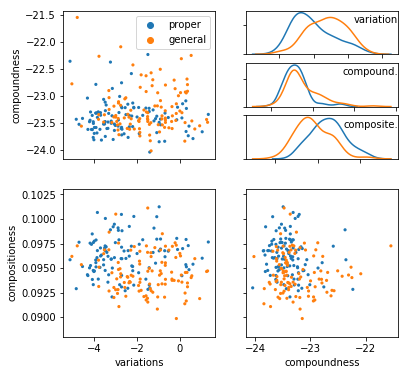

In [19]:
fig = plt.figure()
gs0 = gridspec.GridSpec(2, 2, figure=fig)
gs1 = gridspec.GridSpecFromSubplotSpec(3, 1, subplot_spec=gs0[0,1])

ax10 = plt.Subplot(fig, gs0[1,0])
ax11 = plt.Subplot(fig, gs0[1,1])
ax00 = plt.Subplot(fig, gs0[0,0])


ax01a = plt.Subplot(fig, gs1[0,0])
ax01b = plt.Subplot(fig, gs1[1,0])
ax01c = plt.Subplot(fig, gs1[2,0])

# fig.suptitle("Scatter plots of features in classifiying proper QIEs")
fig.set_size_inches(6,6)

SZ = 10
sns.set_palette('tab10')
sns.scatterplot(x=pr_vars_feats, y=pr_comp_feats, hue=is_proper, marker='o', linewidth=0, s=SZ, ax=ax00)
sns.scatterplot(x=pr_vars_feats, y=pr_composite_feats, hue=is_proper, marker='o', linewidth=0, s=SZ, ax=ax10)
sns.scatterplot(x=pr_comp_feats, y=pr_composite_feats, hue=is_proper, marker='o', linewidth=0, s=SZ, ax=ax11)

sns.distplot(proper_vars_feats, label='proper', hist=False, kde=True, ax=ax01a)
sns.distplot(generic_vars_feats, label='general', hist=False, kde=True, ax=ax01a)
sns.distplot(proper_comp_feats, label='proper', hist=False, kde=True, ax=ax01b)
sns.distplot(generic_comp_feats, label='general', hist=False, kde=True, ax=ax01b)
sns.distplot(proper_composite_feats, label='proper', hist=False, kde=True, ax=ax01c)
sns.distplot(generic_composite_feats, label='general', hist=False, kde=True, ax=ax01c)

# axes[0][1].axis('off')
# axes[0][1].legend(loc="lower left")
feat_labels = ["variation", "compound.", "composite."]
for ax01_i, ax_label in zip((ax01a, ax01b, ax01c), feat_labels):
    ax01_i.get_legend().remove()
    ax01_i.set_yticklabels([])
    ax01_i.set_xticklabels([])
    ax01_i.text(1, 0.9, ax_label,
        horizontalalignment='right',
        verticalalignment='top',
        transform = ax01_i.transAxes)
ax10.set_xlabel('variations')
ax10.set_ylabel('compositioness')
ax10.get_legend().remove()
ax11.set_xlabel('compoundness')
ax11.set_yticklabels([])
ax11.get_legend().remove()
ax00.set_ylabel('compoundness')
ax00.set_xticklabels([])
ax00.legend(loc="upper right")

fig.add_subplot(ax10)
fig.add_subplot(ax11)
fig.add_subplot(ax00)
fig.add_subplot(ax01a)
fig.add_subplot(ax01b)
fig.add_subplot(ax01c)

plt.show()

In [20]:
proper_scatter_path = get_cache_path('model_results', 'qie_proper_scatters_dist.png')
fig.savefig(proper_scatter_path, dpi=150)

In [17]:
mean_groups(proper_vars_feats, generic_vars_feats, "Variation, Proper vs. General")
mean_groups(proper_comp_feats, generic_comp_feats, "Compound, Proper vs. General")
mean_groups(proper_composite_feats, generic_composite_feats, "Composite, Proper vs. General")

----------
Variation, Proper vs. General (mean) -2.5397 vs. -1.5236
Variation, Proper vs. General (SE) 1.41E-01 vs. 1.30E-01
Variation, Proper vs. General t(214) = -5.2722, p = 3.29E-07
----------
Compound, Proper vs. General (mean) -23.4004 vs. -23.2377
Compound, Proper vs. General (SE) 2.92E-02 vs. 3.92E-02
Compound, Proper vs. General t(214) = -3.3128, p = 1.08E-03
----------
Composite, Proper vs. General (mean) 0.0963 vs. 0.0945
Composite, Proper vs. General (SE) 1.89E-04 vs. 1.95E-04
Composite, Proper vs. General t(214) = 6.4068, p = 9.31E-10
